In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)
# Set path = to external drive for data.
# untar_data(url:str, fname:PathOrStr=None, dest:PathOrStr=None, data=True, force_download=False)
#path = untar_data(URLs.PETS, 'new location/archive/oxford-iiil-pet.tgz', 'new location/data/', force_download=False)

In [4]:
path.ls()

(#2) [Path('../data/oxford-iiit-pet/annotations'),Path('../data/oxford-iiit-pet/images')]

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [6]:
files[0],files[6]

(Path('../data/oxford-iiit-pet/images/Abyssinian_1.jpg'),
 Path('../data/oxford-iiit-pet/images/Abyssinian_104.jpg'))

In [7]:
def label_func(f): return f[0].isupper()

In [8]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

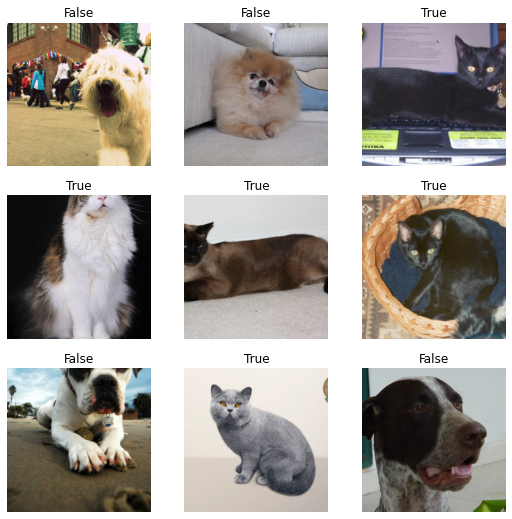

In [9]:
# check if everything looks okay with the show_batch method (True is for cat, False is for dog):
dls.show_batch()

In [54]:
# Then we can create a Learner, which is a fastai object that combines the data and a model for training,
# and uses transfer learning to fine tune a pretrained model in just two lines of code:

learn = cnn_learner(dls, resnet34, metrics=error_rate)
#learn.fine_tune(1) # Require more compute

In [55]:
learn.predict(files[0])

('False', tensor(0), tensor([0.5277, 0.4723]))

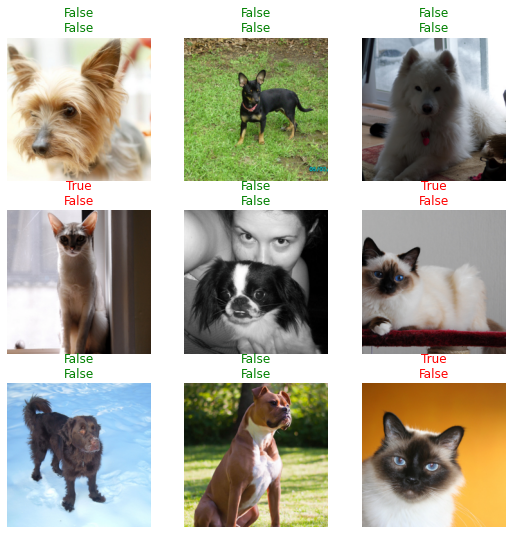

In [57]:
# Cat = True, Dogs = False
learn.show_results()

In [58]:
files[0].name

'Egyptian_Mau_167.jpg'

In [59]:
pat = r'^(.*)_\d+.jpg'

In [60]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

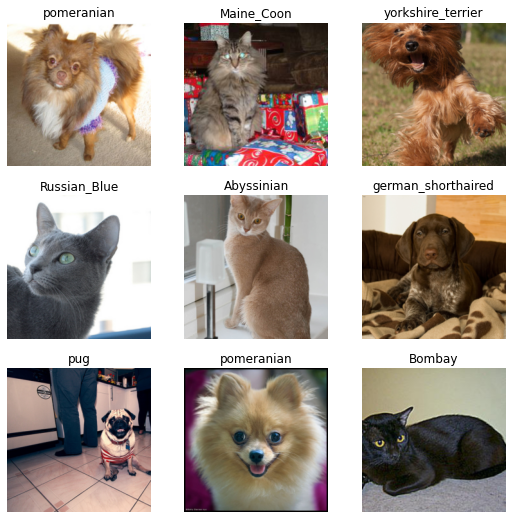

In [61]:
dls.show_batch()

In [62]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460),
                                    batch_tfms=aug_transforms(size=224))

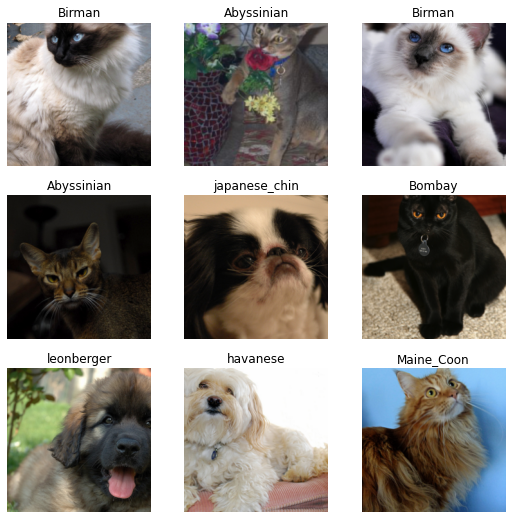

In [63]:
dls.show_batch()

In [64]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0020892962347716093)

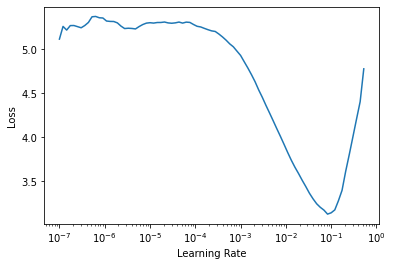

In [65]:
learn.lr_find()

In [66]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.294553,0.315048,0.109608,27:10


epoch,train_loss,valid_loss,error_rate,time
0,0.470169,0.356929,0.106901,37:33
1,0.419849,0.332842,0.097429,37:20
2,0.257452,0.260837,0.075101,38:29
3,0.145372,0.218231,0.064953,38:11


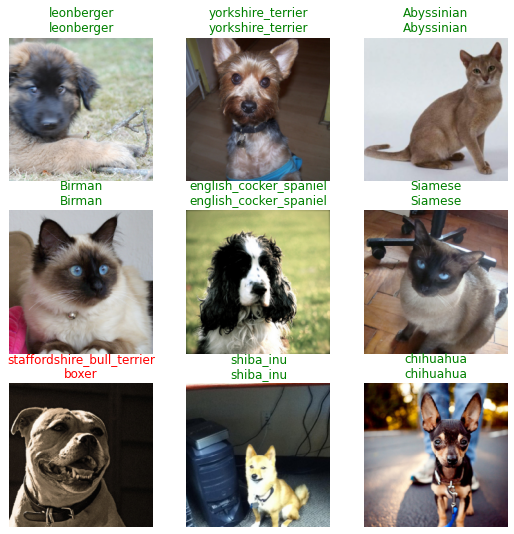

In [67]:
learn.show_results()

In [22]:
interp = Interpretation.from_learner(learn)

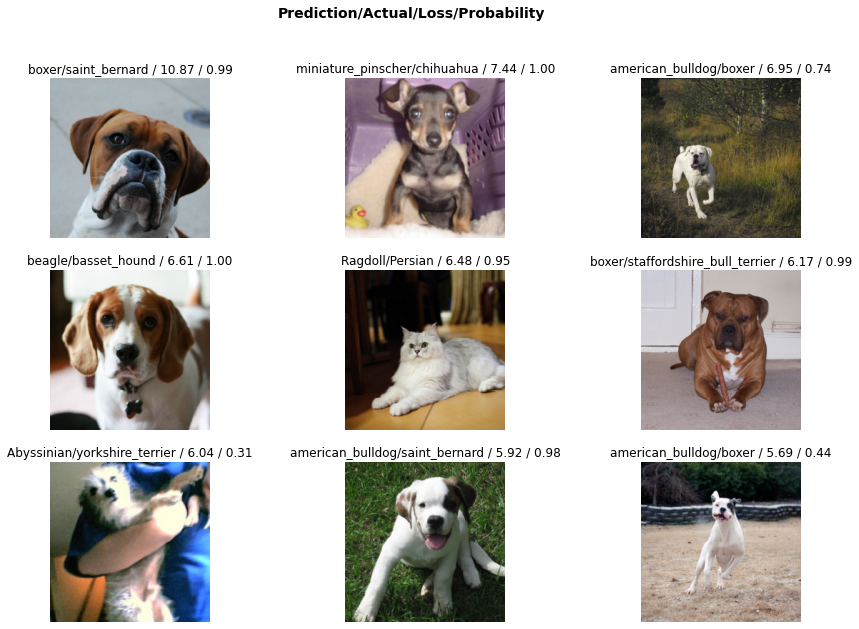

In [23]:
interp.plot_top_losses(9, figsize=(15,10))

In [ ]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224))

In [ ]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images")

In [ ]:
dls.show_batch(max_n=9)

In [ ]:
# Multi-label classification
# For this task, we will use the Pascal Dataset that contains images with different kinds of objects/persons. It's orginally a dataset for object detection, meaning the task is not only to detect if there is an instance of one class of an image, but to also draw a bounding box around it. Here we will just try to predict all the classes in one given image.

# Multi-label classification defers from before in the sense each image does not belong to one category. An image could have a person and a horse inside it for instance. Or have none of the categories we study.

# As before, we can download the dataset pretty easily:

In [ ]:
path = untar_data(URLs.PASCAL_2007)
path.ls()

In [ ]:
df = pd.read_csv(path/'train.csv')
df.head()

In [ ]:
dls = ImageDataLoaders.from_df(df, path, folder='train', valid_col='is_valid', label_delim=' ',
                               item_tfms=Resize(460), batch_tfms=aug_transforms(size=224))

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.5))

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(4, 3e-2)

In [ ]:
learn.show_results()

In [ ]:
learn.predict(path/'train/000005.jpg')

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9)

In [ ]:
df.head()

In [ ]:
pascal = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=ColSplitter('is_valid'),
                   get_x=ColReader('fname', pref=str(path/'train') + os.path.sep),
                   get_y=ColReader('labels', label_delim=' '),
                   item_tfms = Resize(460),
                   batch_tfms=aug_transforms(size=224))

In [ ]:
dls = pascal.dataloaders(df)

In [ ]:
dls.show_batch(max_n=9)